# Ajneya Lal

## Research question/interests


Research Question : How do demographics, such as age and income, affect credit card churn rates?

This question aims to understand how demographic factors may influence customer churn in credit card services. By analysing the relationship between demographic variables and churn rates, we can gain insight into which customer segments are most at risk of churn.

Analysis plan: I will begin by dividing the dataset into different demographic segments, such as age groups or income brackets, and comparing churn rates between these groups. Then  use regression analysis to model the relationship between demographic variables and churn rates, controlling for other factors that may also influence churn.




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Understanding my variables

In [16]:
df.shape

(10127, 23)

In [16]:
#The dataset has 10127 rows and 23 columns.

(10127, 23)

In [18]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [22]:
#We can see all the names of the columns in the dataset , there are a lot of columns some of which are not needed in my research.
#Therefore , I will be  remooving them in further steps.

In [19]:
df.nunique(axis=0)
#To see the number of unique values in my dataset for each variable.

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [52]:
print(df.dtypes)
#Checking the datat types of each column

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [21]:
df.describe()
#A numerical summary of the variables in the dataset.

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Cleaning my Dataset

In [ ]:
#The first step in cleaning my dataset is remvoing redundant variables.

In [41]:
newdf = df.drop(columns=['Avg_Open_To_Buy','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM' ,'Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

In [42]:
newdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1.335,1144,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1.541,1291,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,2.594,1887,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1.405,1171,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,2.175,816,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,0.703,15476,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,0.804,8764,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,0.819,10291,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,0.535,8395,0.000


In [49]:
#The second step in cleaning my dataset is remvoing null values
newdf_cleaned = newdf.dropna(axis=0)

In [51]:
newdf.shape

(10127, 15)

In [48]:
newdf_cleaned.shape

(10127, 15)

In [ ]:
#The dataset does not contain any null values .Therefore , the shape of the dataset has not been changed.

In [54]:
newdf_cleaned = pd.get_dummies(newdf_cleaned, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Converting categorical variables into numerical values

In [56]:
print(newdf_cleaned.dtypes)
# Checking the data types of each column

Attrition_Flag                     object
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Months_Inactive_12_mon              int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Avg_Utilization_Ratio             float64
Gender_M                            uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Marital_Status_Unknown              uint8
Income_Category_$40K - $60K         uint8
Income_Category_$60K - $80K         uint8
Income_Category_$80K - $120K        uint8
Income_Category_Less than $40K    

In [125]:
print(newdf_cleaned)

          Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0      Existing Customer            45                3              39   
1      Existing Customer            49                5              44   
2      Existing Customer            51                3              36   
3      Existing Customer            40                4              34   
4      Existing Customer            40                3              21   
...                  ...           ...              ...             ...   
10122  Existing Customer            50                2              40   
10123  Attrited Customer            41                2              25   
10124  Attrited Customer            44                1              36   
10125  Attrited Customer            30                2              36   
10126  Attrited Customer            43                2              25   

       Months_Inactive_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                           1  

## Analyzing relationships between variables

In [ ]:
# Exploring the distrubution of churn rates.

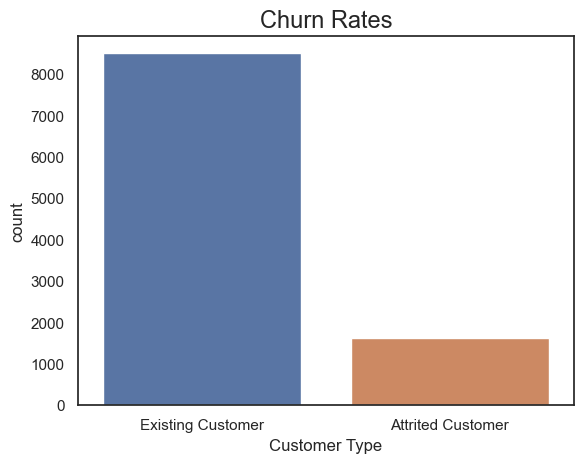

In [104]:
sns.countplot(x='Attrition_Flag', data=newdf_cleaned)
plt.title('Churn Rates',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.show()

In [ ]:
# Exploring the distrubution of age

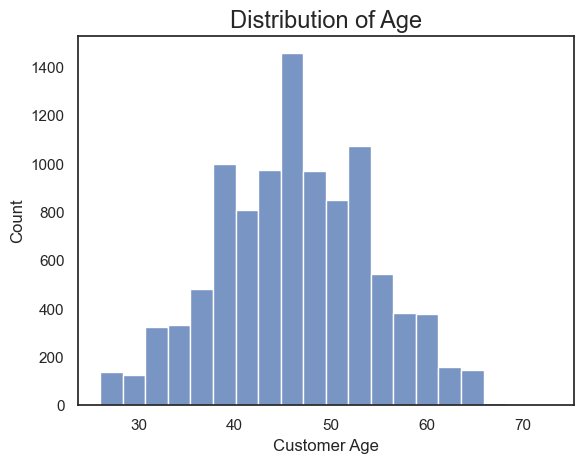

In [105]:
sns.histplot(x='Customer_Age', data=newdf_cleaned, bins=20)
plt.title('Distribution of Age',fontdict={'size': 17})
plt.xlabel('Customer Age', fontdict={'size': 12})
plt.show()

In [ ]:
# Exploring the relationship between age and churn rates

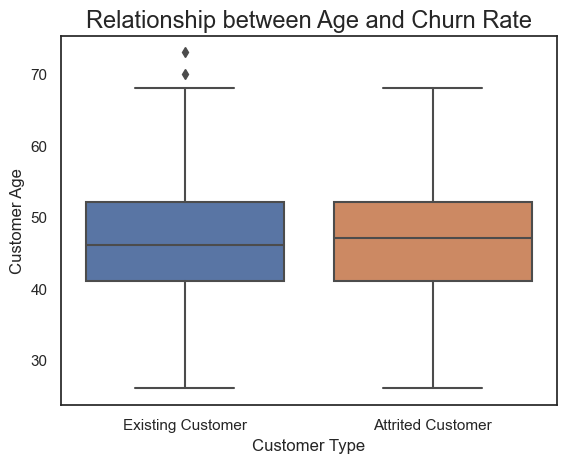

In [107]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=newdf_cleaned)
plt.title('Relationship between Age and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.ylabel('Customer Age', fontdict={'size': 12})
plt.show()

In [61]:
# Exploring the distribution of income

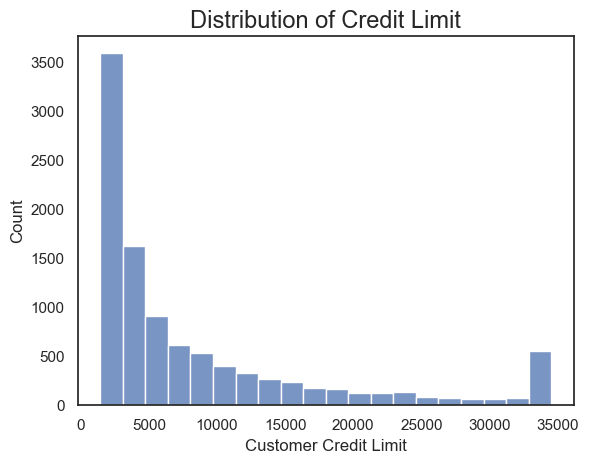

In [108]:
sns.histplot(x='Credit_Limit', data=newdf_cleaned, bins=20)
plt.title('Distribution of Credit Limit',fontdict={'size': 17})
plt.xlabel('Customer Credit Limit', fontdict={'size': 12})
plt.show()

In [63]:
# Exploring the relationship between income and churn rates

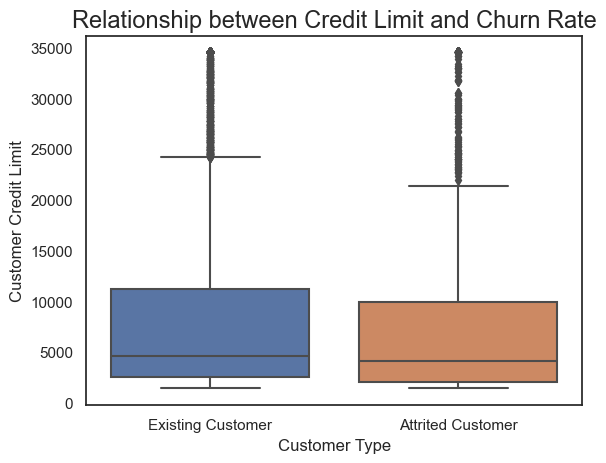

In [111]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=newdf_cleaned)
plt.title('Relationship between Credit Limit and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.ylabel('Customer Credit Limit', fontdict={'size': 12})
plt.show()

In [ ]:
#Exploring the distribution of gender

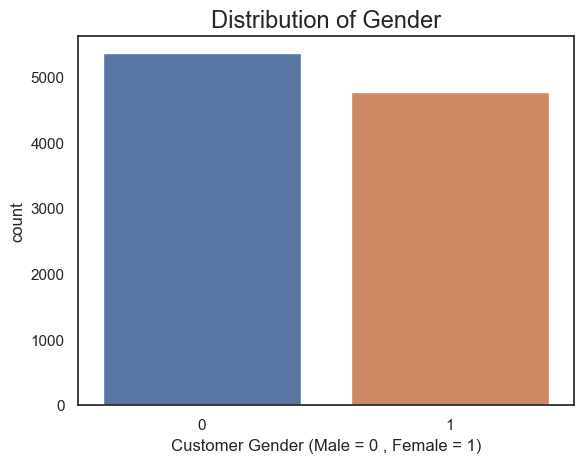

In [114]:
sns.countplot(x='Gender_M', data=newdf_cleaned)
plt.title('Distribution of Gender',fontdict={'size': 17})
plt.xlabel('Customer Gender (Male = 0 , Female = 1)', fontdict={'size': 12})
plt.show()

In [80]:
# Exploring the relationship between gender and churn rates

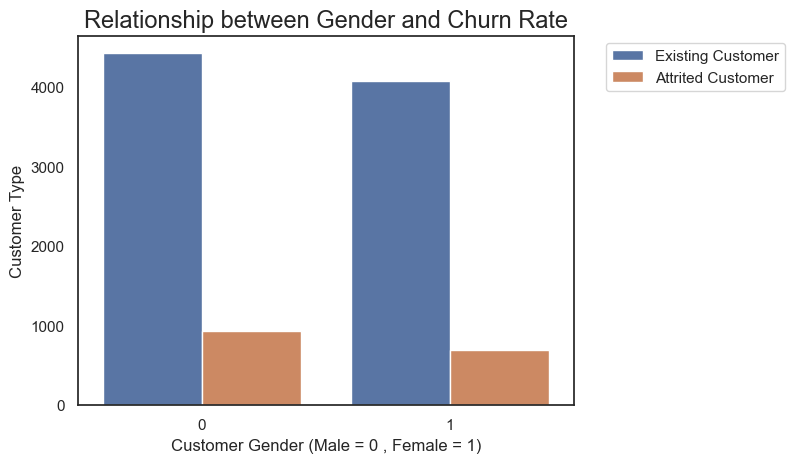

In [118]:
sns.countplot(x='Gender_M', hue='Attrition_Flag', data=newdf_cleaned)
plt.title('Relationship between Gender and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Gender (Male = 0 , Female = 1)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [83]:
# Exploring the distribution of education level

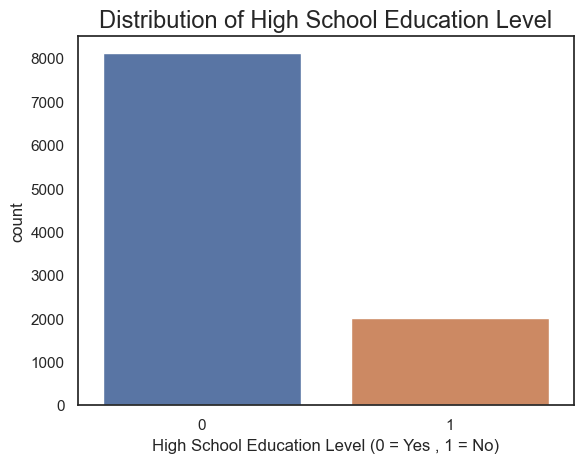

In [169]:
sns.countplot(x='Education_Level_High School', data=newdf_cleaned)
plt.title('Distribution of High School Education Level',fontdict={'size': 17})
plt.xlabel('High School Education Level (0 = Yes , 1 = No)', fontdict={'size': 12})
plt.show()

In [85]:
# Exploring the relationship between education level and churn rates

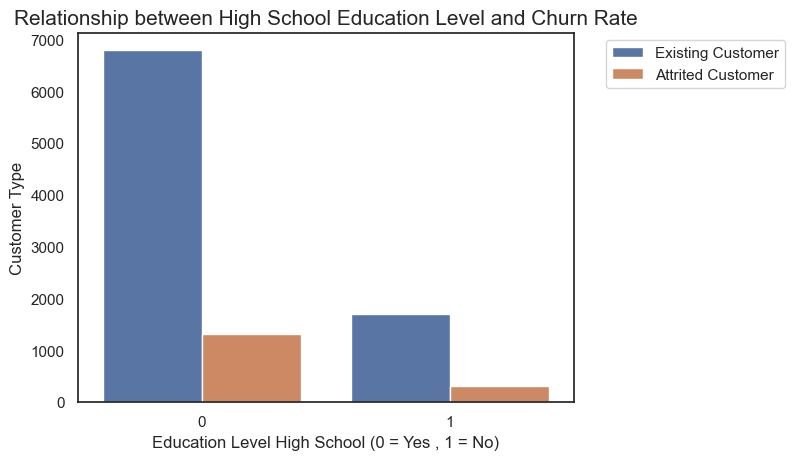

In [166]:
sns.countplot(x='Education_Level_High School', hue='Attrition_Flag', data=newdf_cleaned)
plt.title('Relationship between High School Education Level and Churn Rate' , fontdict={'size': 15})
plt.xlabel('Education Level High School (0 = Yes , 1 = No)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Exploring the distribution of marital status

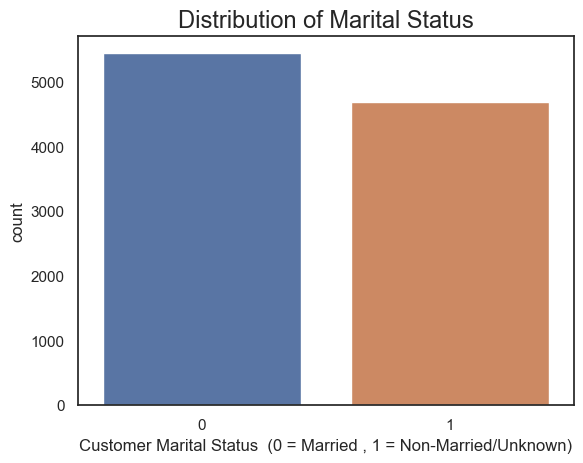

In [182]:
sns.countplot(x='Marital_Status_Married', data=newdf_cleaned)
plt.title('Distribution of Marital Status' ,fontdict={'size': 17})
plt.xlabel('Customer Marital Status  (0 = Married , 1 = Non-Married/Unknown)', fontdict={'size': 12})
plt.show()

In [ ]:
# Exploring the relationship between marital status and churn rates

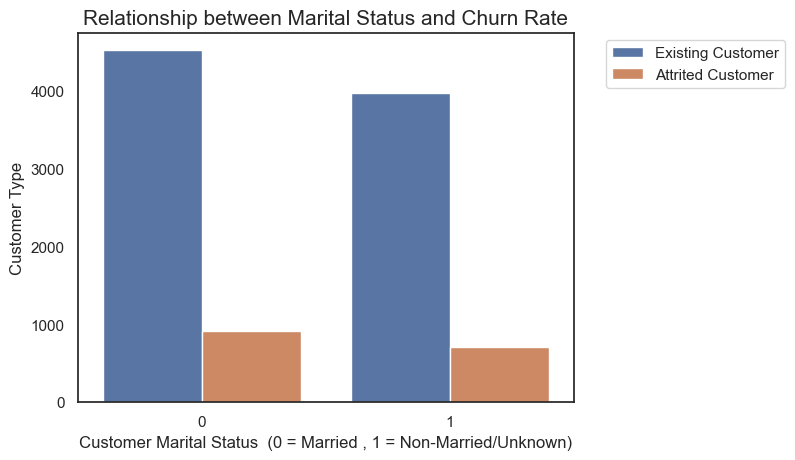

In [181]:
sns.countplot(x='Marital_Status_Married', hue='Attrition_Flag', data=newdf_cleaned)
plt.title('Relationship between Marital Status and Churn Rate',fontdict={'size': 15})
plt.xlabel('Customer Marital Status  (0 = Married , 1 = Non-Married/Unknown)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [91]:
# Exploring the distribution of income category

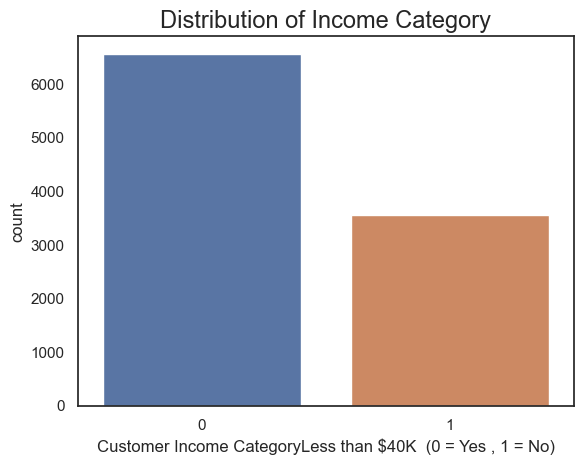

In [180]:
sns.countplot(x='Income_Category_Less than $40K', data=df)
plt.title('Distribution of Income Category',fontdict={'size': 17})
plt.xlabel('Customer Income CategoryLess than $40K  (0 = Yes , 1 = No)', fontdict={'size': 12})
plt.show()


In [ ]:
# Exploring the relationship between income category and churn rates

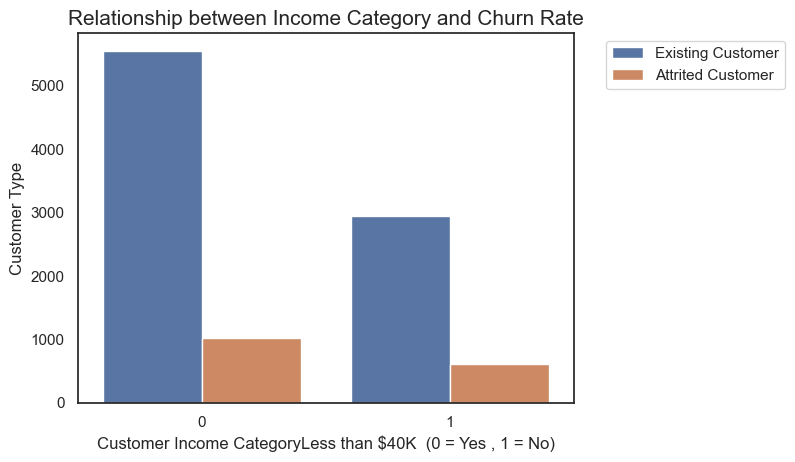

In [186]:
sns.countplot(x='Income_Category_Less than $40K', hue='Attrition_Flag', data=df)
plt.title('Relationship between Income Category and Churn Rate',fontdict={'size': 15})
plt.xlabel('Customer Income CategoryLess than $40K  (0 = Yes , 1 = No)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Exploring the distribution of card category

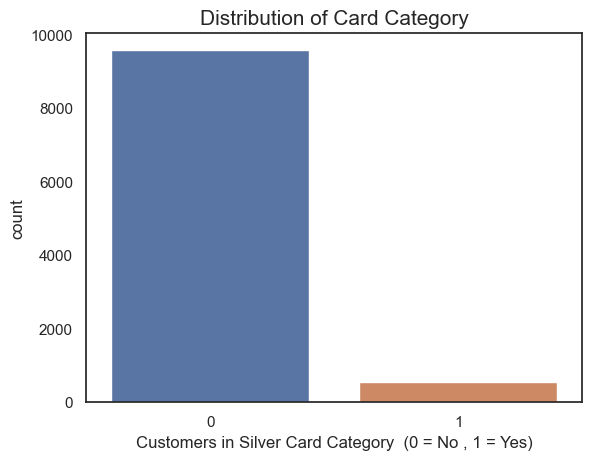

In [189]:
sns.countplot(x='Card_Category_Silver', data=df)
plt.title('Distribution of Card Category',fontdict={'size': 15})
plt.xlabel('Customers in Silver Card Category  (0 = No , 1 = Yes)', fontdict={'size': 12})
plt.show()


In [ ]:
# Exploring the relationship between card category and churn rates

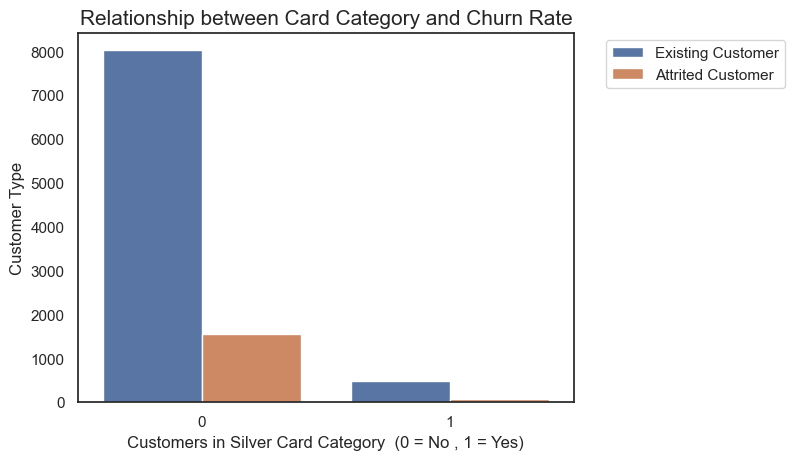

In [192]:
sns.countplot(x='Card_Category_Silver', hue='Attrition_Flag', data=df)
plt.title('Relationship between Card Category and Churn Rate',fontdict={'size': 15})
plt.xlabel('Customers in Silver Card Category  (0 = No , 1 = Yes)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
